## ML + Evaluation - Dataset 3

#### Import libraries and dataset


In [8]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [9]:
df = pd.read_csv("../data/processed/dataset_3_processed.csv")

X = df.drop(columns=["Label"])
y = df["Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define cross-validation strategy (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#### CatBoost

##### Base CatBoost

Base CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     78585
           1       0.84      0.38      0.52     31285

    accuracy                           0.80    109870
   macro avg       0.82      0.68      0.70    109870
weighted avg       0.81      0.80      0.78    109870



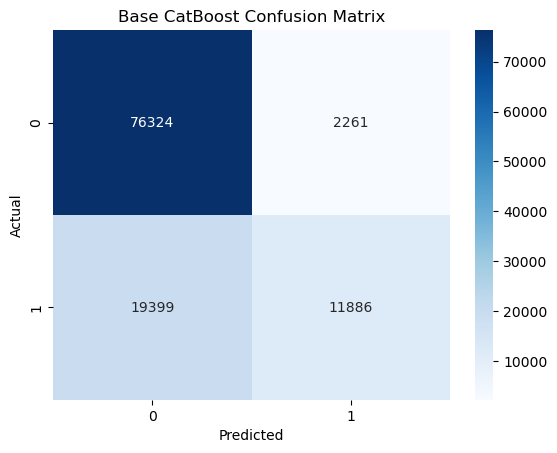

In [10]:
base_catboost = CatBoostClassifier(verbose=0)
base_catboost.fit(X_train, y_train)

# Evaluate model
y_pred_base = base_catboost.predict(X_test)

print("Base CatBoost Classification Report:")
print(classification_report(y_test, y_pred_base))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_base), annot=True, fmt="d", cmap="Blues")
plt.title("Base CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### GridSearch CatBoost

In [12]:
catboost_grid = {
    'iterations': [300, 500, 700],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

catboost_model = CatBoostClassifier(verbose=0)
grid_search = GridSearchCV(catboost_model, param_grid=catboost_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_catboost = grid_search.best_estimator_
print(f"Best CatBoost Model: {grid_search.best_params_}")

# Save model
joblib.dump(best_catboost, "../models/dataset_3/catboost_ds_3.pkl")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best CatBoost Model: {'depth': 10, 'iterations': 700, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


['../models/dataset_3/catboost_ds_3.pkl']

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     78585
           1       0.84      0.39      0.54     31285

    accuracy                           0.81    109870
   macro avg       0.82      0.68      0.71    109870
weighted avg       0.81      0.81      0.78    109870



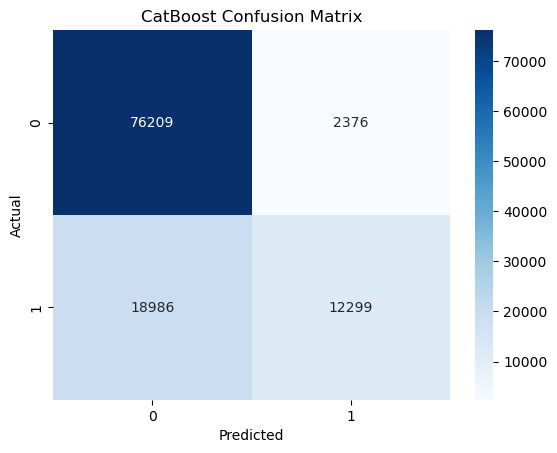

In [13]:
# Evaluate CatBoost
y_pred_catboost = best_catboost.predict(X_test)

print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_catboost), annot=True, fmt="d", cmap="Blues")
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### XGBoost

##### Base XGBoost

Base XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     78585
           1       0.84      0.37      0.52     31285

    accuracy                           0.80    109870
   macro avg       0.82      0.67      0.70    109870
weighted avg       0.81      0.80      0.77    109870



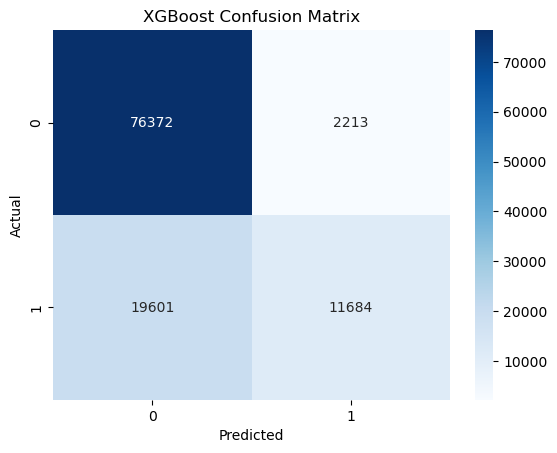

In [14]:
xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate model
y_pred_xgb = xgb_model.predict(X_test)

print("Base XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Gridsearch XGBoost

In [15]:
xgboost_grid = {
    'n_estimators': [300, 500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgboost_model = XGBClassifier(eval_metric='logloss')

grid_search = GridSearchCV(xgboost_model, param_grid=xgboost_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_xgboost = grid_search.best_estimator_
print(f"Best XGBoost Model: {grid_search.best_params_}")

# Save model
joblib.dump(best_xgboost, "../models/dataset_3/xgboost_ds_3.pkl")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/lib/python3/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best XGBoost Model: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.8}


['../models/dataset_3/xgboost_ds_3.pkl']

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     78585
           1       0.84      0.40      0.54     31285

    accuracy                           0.81    109870
   macro avg       0.82      0.68      0.71    109870
weighted avg       0.81      0.81      0.78    109870



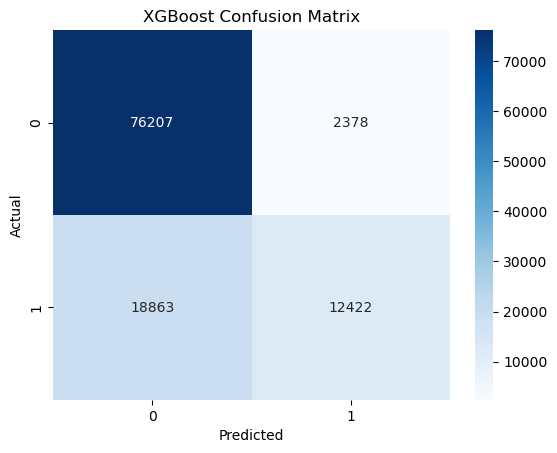

In [16]:
y_pred_xgboost = best_xgboost.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgboost))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgboost), annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### MLP

##### Base MLP

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     78585
           1       0.84      0.35      0.49     31285

    accuracy                           0.80    109870
   macro avg       0.81      0.66      0.68    109870
weighted avg       0.80      0.80      0.76    109870



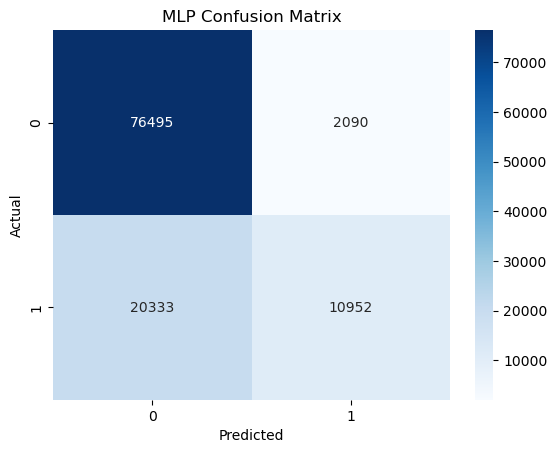

In [17]:
mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_model.fit(X_train, y_train)

# Evaluate model
y_pred_mlp = mlp_model.predict(X_test)

print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt="d", cmap="Blues")
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Gridsearch MLP

In [ ]:
mlp_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [.0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000, 2000]
}

mlp_model = MLPClassifier()

grid_search = GridSearchCV(mlp_model, param_grid=mlp_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_mlp = grid_search.best_estimator_
print(f"Best MLP Model: {grid_search.best_params_}")

# Save model
joblib.dump(best_mlp, "../models/dataset_3/mlp_ds_3.pkl")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best MLP Model: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'max_iter': 2000, 'solver': 'adam'}


['../models/dataset_3/mlp_ds_3.pkl']

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.88     78585
           1       0.85      0.37      0.51     31285

    accuracy                           0.80    109870
   macro avg       0.82      0.67      0.69    109870
weighted avg       0.81      0.80      0.77    109870



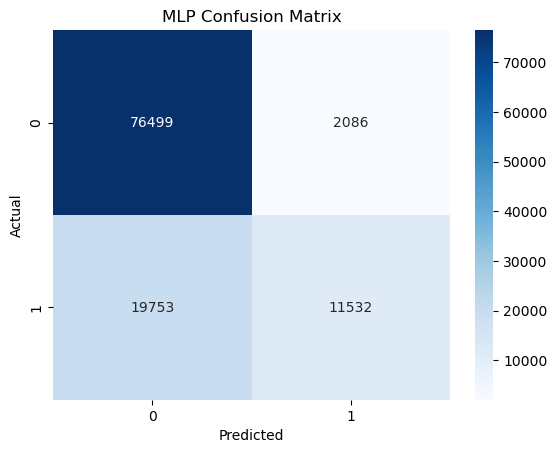

In [19]:
y_pred_mlp = best_mlp.predict(X_test)

print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt="d", cmap="Blues")
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()